### Task 5: SALES PREDICTION USING PYTHON:

Sales prediction means predicting how much of a product people will buy based on factors such as the amount we spend to advertise our product, the segment of people we advertise for, or the platform we are advertising on about our product. 

In [1]:
#Importing all the necessary libraries: 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ads.csv")  #Reading the dataset

In [3]:
print(data.head(5))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.shape

(200, 4)

In [7]:
 data.isnull().sum()  #checking whether this dataset contains any missing values or not

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Summary of the above data :

Average expenditure is highest on TV as the mean expense on TV ads is 147.04 units.
Whereas, Average expenditure is lowest on Radio as the mean expense on Radio is 23.26 units.
Max sale is 27 and Min sale is 1.6.

### Visualising the relationship: 

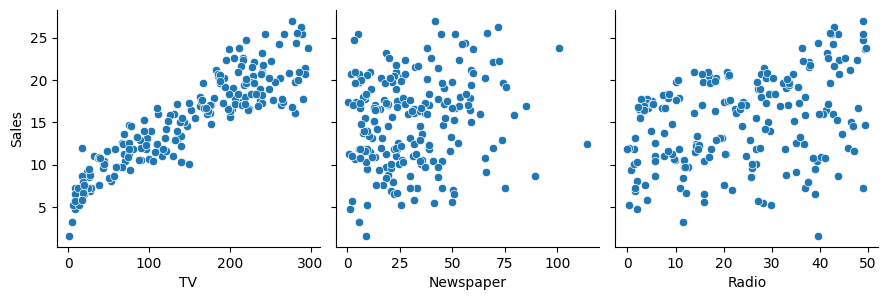

In [8]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()

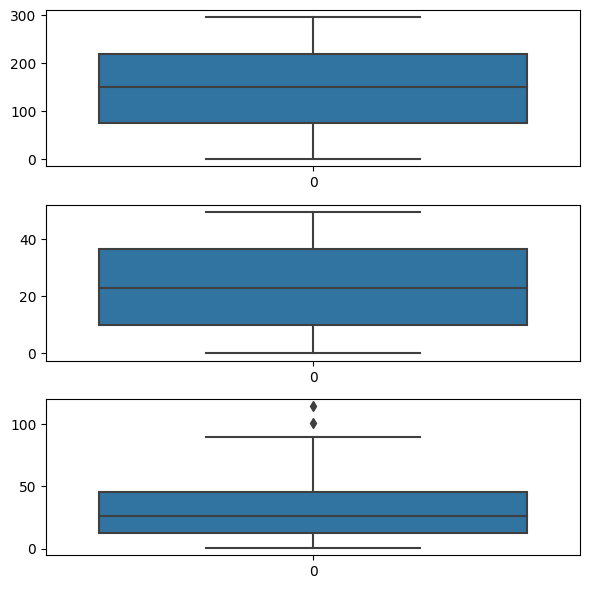

In [9]:
fig, axis = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(data['TV'], ax = axis[0])
plt2 = sns.boxplot(data['Radio'], ax = axis[1])
plt3 = sns.boxplot(data['Newspaper'], ax = axis[2])
plt.tight_layout()


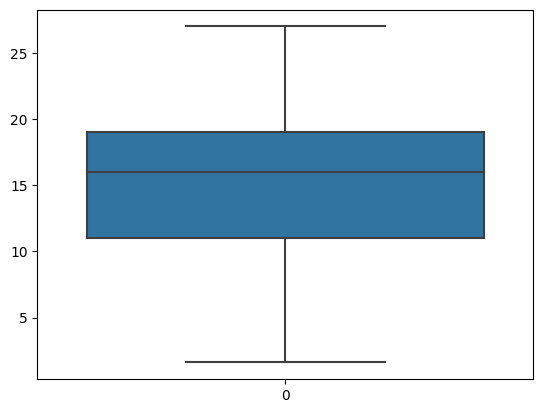

In [10]:
sns.boxplot(data['Sales'])
plt.show()     

### Correlation of all columns with the sales column:

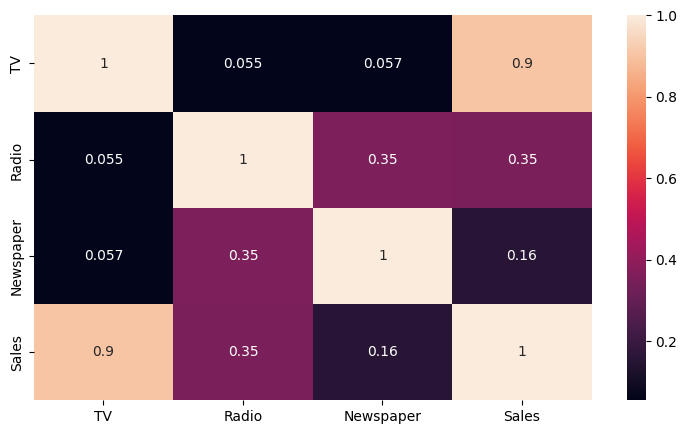

In [11]:
corr= data.corr() #Correlation Heatmap

plt.figure(figsize= (9,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
print(corr)

#Sales is highly correlated with tv

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


### Training our model:

In [13]:
X= data.iloc[:, :-1]

In [14]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y= data.Sales

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 100)

In [17]:
x_train.shape

(140, 3)

In [18]:
print(x_train)

        TV  Radio  Newspaper
74   213.4   24.6       13.1
3    151.5   41.3       58.5
185  205.0   45.1       19.6
26   142.9   29.3       12.6
90   134.3    4.9        9.3
..     ...    ...        ...
87   110.7   40.6       63.2
103  187.9   17.2       17.9
67   139.3   14.5       10.2
24    62.3   12.6       18.3
8      8.6    2.1        1.0

[140 rows x 3 columns]


In [19]:
x_test.shape

(60, 3)

In [20]:
print(x_test)

        TV  Radio  Newspaper
126    7.8   38.9       50.6
104  238.2   34.3        5.3
99   135.2   41.7       45.9
92   217.7   33.5       59.0
111  241.7   38.0       23.2
167  206.8    5.2       19.4
116  139.2   14.3       25.6
96   197.6    3.5        5.9
52   216.4   41.7       39.6
69   216.8   43.9       27.2
164  117.2   14.7        5.4
124  229.5   32.3       74.2
182   56.2    5.7       29.7
154  187.8   21.1        9.5
125   87.2   11.8       25.9
196   94.2    4.9        8.1
194  149.7   35.6        6.0
177  170.2    7.8       35.2
163  163.5   36.8        7.4
31   112.9   17.4       38.6
11   214.7   24.0        4.0
73   129.4    5.7       31.3
15   195.4   47.7       52.9
41   177.0   33.4       38.7
97   184.9   21.0       22.0
128  220.3   49.0        3.2
133  219.8   33.5       45.1
82    75.3   20.3       32.5
139  184.9   43.9        1.7
123  123.1   34.6       12.4
83    68.4   44.5       35.6
65    69.0    9.3        0.9
151  121.0    8.4       48.7
162  188.4   1

In [21]:
print(y_train)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [22]:
print(y_test)

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64


### Linear Regression Model: 

In [23]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.coef_

array([0.05382911, 0.11001224, 0.00628995])

In [25]:
model.intercept_

4.334595861728431

In [26]:
y_train_pred= model.predict(x_train)

In [27]:
y_test_pred= model.predict(x_test)

In [28]:
print("TRAIN DATA") #evaluation

print("rmse", round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2))
print("r2_score", round(r2_score(y_train, y_train_pred),3))

TRAIN DATA
rmse 1.67
r2_score 0.91


In [29]:
print("Test Data")

print("rmse", round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))
print("r2_score", round(r2_score(y_test, y_test_pred),3))

Test Data
rmse 1.62
r2_score 0.866


In [30]:
ft= [[20,30,40]] #features of TV, Radio and Newspaper
print(model.predict(ft))

[8.96314336]


### Decision Tree Regressor Model: 

In [31]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)


DecisionTreeRegressor()

In [32]:
y_pred = dtr.predict(x_test)

In [33]:
r2 = r2_score(y_test, y_pred)
mean1 = mean_absolute_error(y_test, y_pred)
mean = mean_squared_error(y_test, y_pred, squared=False)

print('accuracy:',(r2)*100)


accuracy: 87.82037927371232
